### Ball tracking from 16px x 16px video

In [27]:
import cv2

cap = cv2.VideoCapture('recordings40px/Camera0_010.mp4')

if not cap.isOpened():
    print("Error opening video stream or file")

else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Frame', frame)
        if cv2.waitKey(30) & 0xFF == 27:  # Press 'Esc' to exit
            break
            
cap.release()
cv2.destroyAllWindows()

### Detect the red ball in the video and add black background

In [28]:
import numpy as np

cap = cv2.VideoCapture('recordings40px/Camera0_010.mp4')

detected_ball = None
last_frame = None
lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)


while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break
    # Create a mask to isolate the red color
    mask = cv2.inRange(frame, lower_red, upper_red)
    # Apply the mask to the frame to detect the red color
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    #   cv2.imshow('Current Frame', frame)
    cv2.imshow('Detected Ball', detected_ball)
    last_frame = frame
    if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
        break

cap.release()
cv2.destroyAllWindows()

### Get and plot coordinates of the detected red ball

In [29]:
# get all the coordinates of the pixels that are between the lower and upper red
red_coordinates = np.column_stack(np.where((last_frame[:, :, 0] >= lower_red[0]) & (last_frame[:, :, 0] <= upper_red[0]) &
    (last_frame[:, :, 1] >= lower_red[1]) & (last_frame[:, :, 1] <= upper_red[1]) &
    (last_frame[:, :, 2] >= lower_red[2]) & (last_frame[:, :, 2] <= upper_red[2])
))
# invert the y-axis so that the origin is at the bottom left
red_coordinates[:, 0] = last_frame.shape[0] - red_coordinates[:, 0]

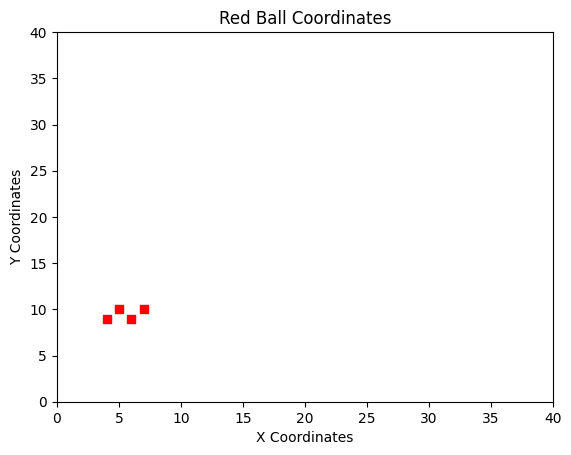

In [30]:
import matplotlib.pyplot as plt
# Calculate the size of each pixel in your plot
pixel_size = 40  # Adjust this value as needed

# Scatter plot with marker size equal to the pixel size
plt.scatter(red_coordinates[:, 1], red_coordinates[:, 0], c='red', marker='s', s=pixel_size)

plt.title('Red Ball Coordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.show()

In [31]:
# calculate the mean of the x and y coordinates
mean_x = np.mean(red_coordinates[:, 1])
mean_y = np.mean(red_coordinates[:, 0])
mean_x, mean_y

(5.5, 9.5)

#### Calculate the middle point of the detected red ball

In [32]:
mean_x = []
mean_y = []
cap = cv2.VideoCapture('recordings40px/Camera0_010.mp4')

lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)
red_coordinates = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    mask = cv2.inRange(frame, lower_red, upper_red)
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    red_coordinates = np.column_stack(np.where((frame[:, :, 0] >= lower_red[0]) & (frame[:, :, 0] <= upper_red[0]) &
    (frame[:, :, 1] >= lower_red[1]) & (frame[:, :, 1] <= upper_red[1]) &
    (frame[:, :, 2] >= lower_red[2]) & (frame[:, :, 2] <= upper_red[2])
    ))
    red_coordinates[:, 0] = frame.shape[0] - red_coordinates[:, 0]
    mean_x.append(np.mean(red_coordinates[:, 1]))
    mean_y.append(np.mean(red_coordinates[:, 0]))
    
cap.release()
cv2.destroyAllWindows()

#### Show the trajectory of the detected red ball

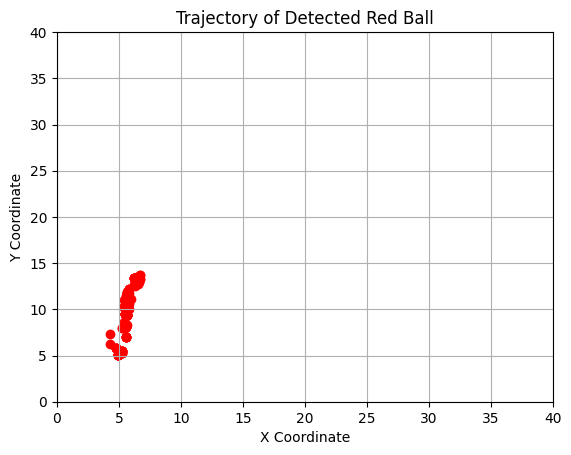

In [33]:
import matplotlib.pyplot as plt

# Plot the trajectory
plt.scatter(mean_x, mean_y, marker='o', linestyle='-', color='red')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectory of Detected Red Ball')

# Invert the y-axis if needed
plt.xlim(0,40)
plt.ylim(0,40)
plt.grid(True)
plt.show()
